**Machine Learning para Predições em Saúde**

---


* Nome:Audencio Victor 
* NUSP:13565975
* Base de dados: SINASC-2020

**Fonte :** PCDaS é uma plataforma pública, gratuita e baseada na nuvem que fornece uma grande quantidade de microdados e ferramentas de análise para pesquisas no campo da saúde. É projetada para ajudar pesquisadores no campo da saúde a acessar e analisar dados para apoiar suas pesquisas e melhorar o entendimento de questões de saúde. Eu não tenho acesso à internet, então não posso fornecer mais informações sobre esta plataforma..




[Fonte de dados](https://https://pcdas.icict.fiocruz.br/)


**Descrição:**

A proposta de aprendizado do projeto da disciplina é trabalhar com um problema de classificação, assim o objetivo é construir um modelo de classificação para predição de baixo peso nascença em com base nas caraterísticas maternas e fetais.

Desfecho: É considerado bebe com peso abaixo de 2500g
Variáveis preditoras: Sexo do bebe, idade materna, escolaridade materna, número de consultas pré-natais, raça da mae.






**Variveis no Banco: **
* 1.Escolaridade Materna 
* 2.Idade Materna 
* 3.Gavidez 
* 4.Consultas 
* 5.Sexxo do Bebe
* 7.Tipo de Parto
* 8.Paridade 
* 9.Baixo peso a nascenca

**Roteiro:**
* Instalação de pacotes e Importação de bibliotecas, 
* Verificação o conjunto de dados ,
* Separação de Conjuntos de treino e teste, 
* Criação dummies para as variáveis categóricas, 
* Padronizacao das variveis Continuas, 
* Obtenção da performance do modelo,
* Execução dos algoritmos de machine learning,
* Seleção de variáveis com BORUTA,
* Valores de Shapley

**Instalação de pacotes adicionais**

In [ ]:
!pip install dfply 
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz

**Importação de bibliotecas**

In [ ]:
import pandas as pd # para processamento de bancos de dados
import numpy as np # para processamento numérico de bancos de dados
import matplotlib # para geração de gráficos
import matplotlib.pyplot as plt # configurações adicionais para os gráficos a serem gerados

# informamos ao Python que estamos usando um notebook e que os gráficos devem ser exibidos nele
%matplotlib inline

import seaborn as sns #alternativa para a matplotlib para geração de gráficos

# SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from dfply import *  # para importar os comandos da biblioteca dfply

import scikitplot as skplt

from dtreeviz.trees import *

import warnings # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

# configurações adicionais de figuras
plt.rcParams["figure.figsize"] = [10, 5]
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})

np.random.seed(42)  # semente de aleatoriedade

In [ ]:
#imformando a localizacao do Dataset 
from google.colab import files 
uploade= files.upload()


Saving dadosML2.dta to dadosML2 (4).dta


In [ ]:
# vou chamar de df o banco carregado  do  STATA
df= pd.read_stata('dadosML2.dta')
df
df.tail
df.columns  # para ver os nomes das  variveis 
list(df.columns.values.tolist()) # listar todas as variaveis 

['idademae',
 'escmae',
 'gravidez',
 'parto',
 'consultas',
 'sexo',
 'idanomal',
 'escmae2010',
 'consprenat',
 'paridade',
 'bpn']

In [ ]:
# Columns
print('List of variables:')
print(list (df.columns.values))

List of variables:
['idademae', 'escmae', 'gravidez', 'parto', 'consultas', 'sexo', 'idanomal', 'escmae2010', 'consprenat', 'paridade', 'bpn']


In [ ]:
df.drop(['parto', 'consprenat'], axis=1, inplace=True)

In [ ]:
# Para as variáveis categóricas iremos criar dummies/ One hotencode
df= pd.get_dummies(df, columns=['escmae', 'consultas',
                                'escmae2010', 'gravidez'])

In [ ]:
# defenindo a variavel desfecho 
target = df["bpn"]  #target variable to predict

df = df.select_dtypes(exclude=[np.object]) # Classifficar apenas variaveis categoricas 



In [ ]:
target

0        1.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
152305   0.00
152306   0.00
152307   0.00
152308   0.00
152309   0.00
Name: bpn, Length: 152310, dtype: float32

In [ ]:
df.describe()

,idademae,sexo,idanomal,paridade,bpn,escmae_1,escmae_2,escmae_3,escmae_4,escmae_5,...,escmae2010_1.0,escmae2010_2.0,escmae2010_3.0,escmae2010_4.0,escmae2010_5.0,escmae2010_9.0,gravidez_1,gravidez_2,gravidez_3,gravidez_9
count,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,...,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00,152310.00
mean,28.64,1.49,2.01,0.61,0.09,0.00,0.00,0.06,0.61,0.32,...,0.01,0.12,0.54,0.06,0.26,0.00,0.97,0.03,0.00,0.00
std,6.69,0.50,0.43,0.49,0.29,0.03,0.07,0.24,0.49,0.47,...,0.11,0.33,0.50,0.24,0.44,0.03,0.16,0.16,0.03,0.01
min,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,29.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,34.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
max,99.00,2.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df.isna()
df.isna().sum()

idademae          0
sexo              0
idanomal          0
paridade          0
bpn               0
escmae_1          0
escmae_2          0
escmae_3          0
escmae_4          0
escmae_5          0
escmae_9          0
consultas_1       0
consultas_2       0
consultas_3       0
consultas_4       0
consultas_9       0
escmae2010_0.0    0
escmae2010_1.0    0
escmae2010_2.0    0
escmae2010_3.0    0
escmae2010_4.0    0
escmae2010_5.0    0
escmae2010_9.0    0
gravidez_1        0
gravidez_2        0
gravidez_3        0
gravidez_9        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152310 entries, 0 to 152309
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idademae        152310 non-null  int8   
 1   sexo            152310 non-null  int8   
 2   idanomal        152310 non-null  int8   
 3   paridade        152310 non-null  int8   
 4   bpn             152310 non-null  float32
 5   escmae_1        152310 non-null  uint8  
 6   escmae_2        152310 non-null  uint8  
 7   escmae_3        152310 non-null  uint8  
 8   escmae_4        152310 non-null  uint8  
 9   escmae_5        152310 non-null  uint8  
 10  escmae_9        152310 non-null  uint8  
 11  consultas_1     152310 non-null  uint8  
 12  consultas_2     152310 non-null  uint8  
 13  consultas_3     152310 non-null  uint8  
 14  consultas_4     152310 non-null  uint8  
 15  consultas_9     152310 non-null  uint8  
 16  escmae2010_0.0  152310 non-null  uint8  
 17  escmae2010

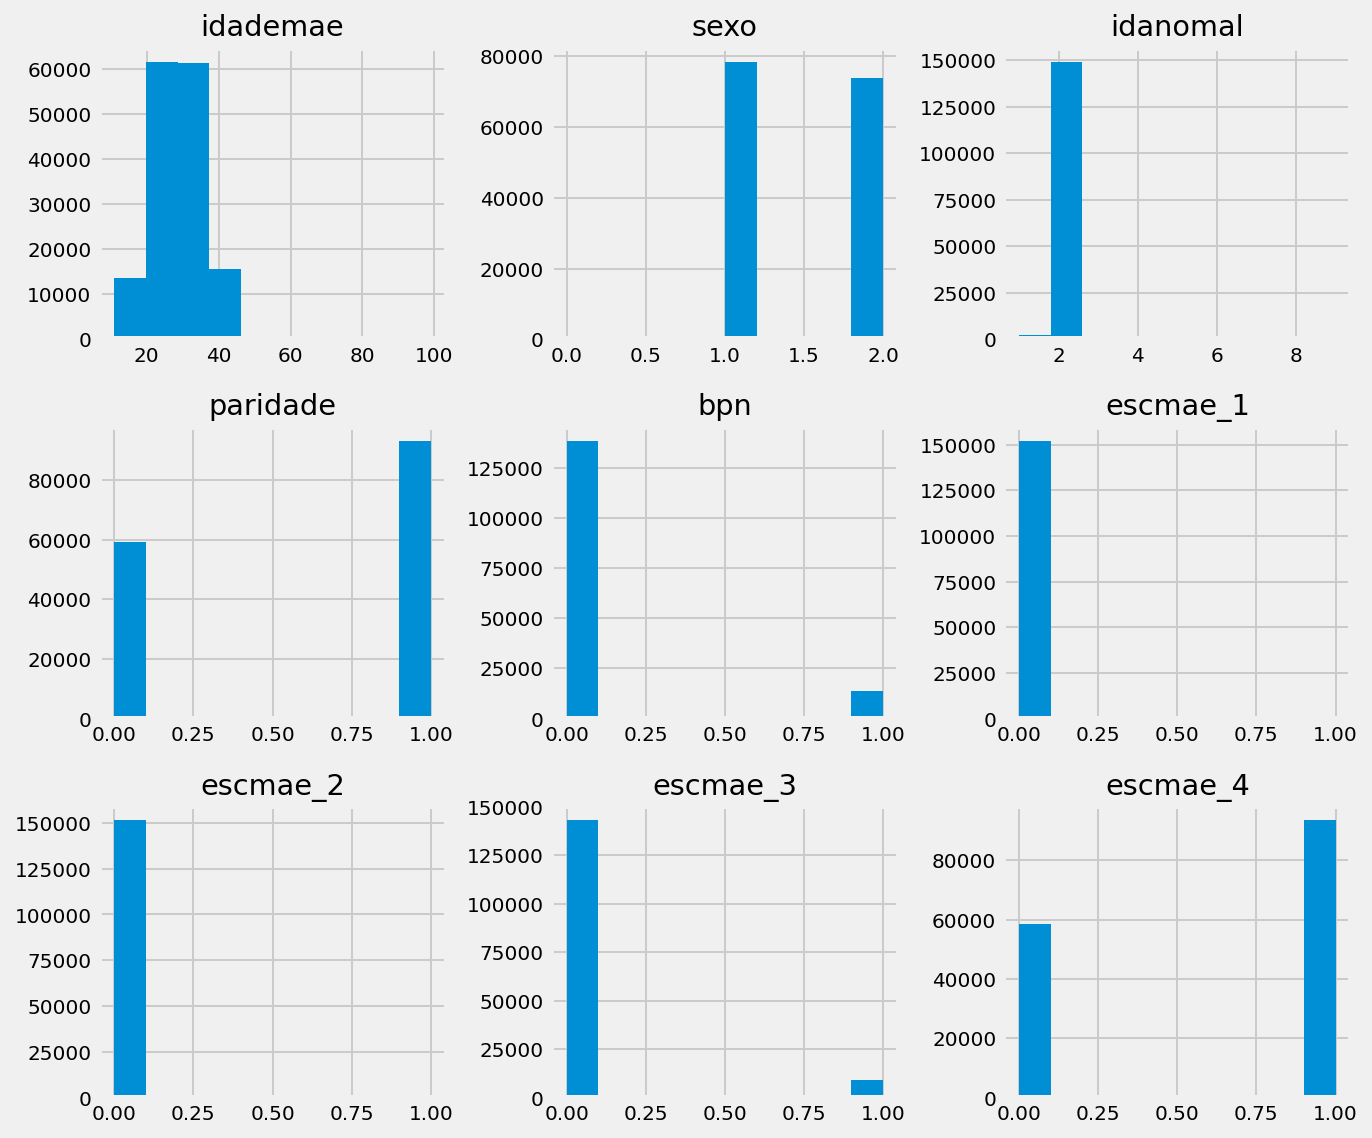

In [ ]:
# construcao de graficos de variaves quantitativas 
df_reduced= df[list(df.columns)[0:9]]
df_reduced.hist(figsize=[10,9]);      



Conjuntos de treino e teste

In [ ]:
variaveis_preditoras = df.iloc[:, df.columns != 'bpn']
classe = df.iloc[:, df.columns == 'bpn']
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras, 
                                                    classe,
                                                    train_size = 0.70,
                                                    random_state = 42)

In [ ]:
X_test.columns

Index(['idademae', 'sexo', 'idanomal', 'paridade', 'escmae_1', 'escmae_2',
       'escmae_3', 'escmae_4', 'escmae_5', 'escmae_9', 'consultas_1',
       'consultas_2', 'consultas_3', 'consultas_4', 'consultas_9',
       'escmae2010_0.0', 'escmae2010_1.0', 'escmae2010_2.0', 'escmae2010_3.0',
       'escmae2010_4.0', 'escmae2010_5.0', 'escmae2010_9.0', 'gravidez_1',
       'gravidez_2', 'gravidez_3', 'gravidez_9'],
      dtype='object')

In [ ]:
X_train.columns

Index(['idademae', 'sexo', 'idanomal', 'paridade', 'escmae_1', 'escmae_2',
       'escmae_3', 'escmae_4', 'escmae_5', 'escmae_9', 'consultas_1',
       'consultas_2', 'consultas_3', 'consultas_4', 'consultas_9',
       'escmae2010_0.0', 'escmae2010_1.0', 'escmae2010_2.0', 'escmae2010_3.0',
       'escmae2010_4.0', 'escmae2010_5.0', 'escmae2010_9.0', 'gravidez_1',
       'gravidez_2', 'gravidez_3', 'gravidez_9'],
      dtype='object')

In [ ]:
# Standarscaler com passthrough tem um problema de ordenação das colunas. Quando aplicamos, ele fornce o resultado com as colunas padronizadas em primeiro, seguidas das demais colunas.
# Para resolver este problema, iremos ordenar as nossas colunas alocando as contínuas nas primeiras posições 

X_train = X_train.loc[:,['idademae', # variaveis continuas 
        'sexo', 'idanomal','paridade', 'escmae_1',
       'escmae_2', 'escmae_3', 'escmae_4', 'escmae_5', 'escmae_9',
       'escmae2010_0.0', 'escmae2010_1.0', 'escmae2010_2.0', 'escmae2010_3.0',
       'escmae2010_4.0', 'escmae2010_5.0', 'escmae2010_9.0', 'gravidez_1',
       'gravidez_2', 'gravidez_3', 'gravidez_9']]

X_test = X_test.loc[:,['idademae',  # variaveis continuas 
        'sexo', 'idanomal' ,'paridade', 'escmae_1',
       'escmae_2', 'escmae_3', 'escmae_4', 'escmae_5', 'escmae_9',
       'escmae2010_0.0', 'escmae2010_1.0', 'escmae2010_2.0', 'escmae2010_3.0',
       'escmae2010_4.0', 'escmae2010_5.0', 'escmae2010_9.0', 'gravidez_1',
       'gravidez_2', 'gravidez_3', 'gravidez_9']]

X_train_columns = X_train.columns
X_test_columns = X_test.columns

Padronizacao das variveis Continuas 


In [ ]:
from sklearn.compose import ColumnTransformer

### variáveis contínuas que serão padronizadas
continuous_cols = ['idademae' ]

def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough' # utilizamos para manter as colunas em que não aplicamos o scaler
  )
  return ct
  
scaler = setScaler()

In [ ]:
scaler.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(), ['idademae'])])

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [ ]:
X_train.head()

,idademae,sexo,idanomal,paridade,escmae_1,escmae_2,escmae_3,escmae_4,escmae_5,escmae_9,...,escmae2010_1.0,escmae2010_2.0,escmae2010_3.0,escmae2010_4.0,escmae2010_5.0,escmae2010_9.0,gravidez_1,gravidez_2,gravidez_3,gravidez_9
0,1.55,1.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1,-1.14,1.00,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.95,1.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.66,1.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
4,0.36,2.00,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
X_test.describe()

,idademae,sexo,idanomal,paridade,escmae_1,escmae_2,escmae_3,escmae_4,escmae_5,escmae_9,...,escmae2010_1.0,escmae2010_2.0,escmae2010_3.0,escmae2010_4.0,escmae2010_5.0,escmae2010_9.0,gravidez_1,gravidez_2,gravidez_3,gravidez_9
count,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,...,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00,45693.00
mean,0.01,1.48,2.01,0.61,0.00,0.00,0.06,0.61,0.32,0.00,...,0.01,0.12,0.54,0.06,0.26,0.00,0.97,0.03,0.00,0.00
std,1.01,0.50,0.43,0.49,0.03,0.07,0.24,0.49,0.47,0.03,...,0.11,0.33,0.50,0.23,0.44,0.03,0.16,0.16,0.03,0.01
min,-2.64,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.84,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,0.06,1.00,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,0.81,2.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
max,3.95,2.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# transformando Y --> 1 e N --> 0 
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

Função auxiliar RunModel (Rodando o modelo )

In [ ]:
# Criando uma função para obtenção dos principais indicadores de performance do modelo
def runModel(model, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title="", pos_label=1):
    """Função auxiliar para execução de modelos de classificação.
    
    Parâmetros:
    
    - model: modelo de classificação a ser executado
    - X_train: base de treinamento das variáveis preditoras
    - y_train: base de treinamento da classe
    - X_test: base de teste das variáveis preditoras
    - y_test: base de teste da classe
    - confusion_matrix (default: True): exibir a matriz de confusão da classificação
    - normalizeCM (default: False): define se a matriz de confusão será normalizada
    - roc (default: True): define se será exibida a curva ROC para o classificador
    - plot_calibration (default: True): define se será exibida a curva de calibração para o classificador
    - title: define o título a ser exibido nos gráficos
    - pos_label: indica qual o valor de y_train e y_test que representa a classe positiva. O valor default é 1. 

    """
    clf = model
    name = title
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)
    else:  # usar decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    if confusion_matrix:
       skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=normalizeCM, title=name)
    if roc:
       skplt.metrics.plot_roc(y_test, prob_pos, plot_micro=False, plot_macro=False, classes_to_plot=[1], title=name,figsize=(10,10))
     
            
    prob_pos = prob_pos[:,1]
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=pos_label)
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tROC(AUC) %1.3f" % roc_auc_score(y_test, prob_pos))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        
    if plot_calibration:
      
      fraction_of_positives, mean_predicted_value = \
                calibration_curve(y_test, prob_pos, n_bins=10)
      plt.rcParams.update({'font.size': 22})
      plt.rc('legend',**{'fontsize':22})
      fig = plt.figure(3, figsize=(10, 10))
      ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
      ax2 = plt.subplot2grid((3, 1), (2, 0))
      ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado",)
      ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                     label="%s (%1.3f)" % (name, clf_score))

      ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                     histtype="step", lw=2)

      ax1.set_ylabel("Fração de positivos")
      ax1.set_ylim([-0.05, 1.05])
      ax1.legend(loc="lower right")
      ax1.set_title('Gráfico de Calibração  (reliability curve)')
      
      ax2.set_xlabel("Valor médio predito")
      ax2.set_ylabel("Quantidade")
      ax2.legend(loc="upper center", ncol=2)
      
      for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(22)
        
      for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(22)
      
      plt.tight_layout()
      plt.show()

In [ ]:
# Função de best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
help(runModel)

Execução dos algoritmos de machine learning

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# modelo random forest
rf = RandomForestClassifier(random_state=42, verbose=1)

Otimização de hiperparâmetros

In [ ]:
np.random.seed(42)

# Número de árvores no Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Número de features a serem consideradas a cada split
max_features = ['log2', 'sqrt']
# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada leaf node
min_samples_leaf = [2, 4]
# Método de seleção das amostras para treinamento de cada árvore
bootstrap = [True, False]
# Criação do param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth#,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }

# Caso deseje rodar GridSearchCV, troque a linha abaixo pela que segue
#cv_rf = GridSearchCV(fit_rf, cv=3, param_grid=param_grid,n_jobs = -1) 

cv_rf = RandomizedSearchCV(rf, n_iter=50, cv=3, verbose=1, param_distributions=param_grid,n_jobs = -1)

In [ ]:
# otimizando os hiperparâmetros
cv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:   15.2s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(random_state=42, verbose=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 16, 20],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   verbose=1)

In [ ]:
# melhores estimadores
rf = cv_rf.best_estimator_
rf

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=550,
                       random_state=42, verbose=1)

In [ ]:
# modelo random forest otimizado
rf = RandomForestClassifier(max_depth=5, max_features='log2', random_state=42,
                       verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Random_Forest:
	Brier: 0.076
	ROC(AUC) 0.644
	Precision: 0.635
	Recall: 0.181
	F1: 0.282



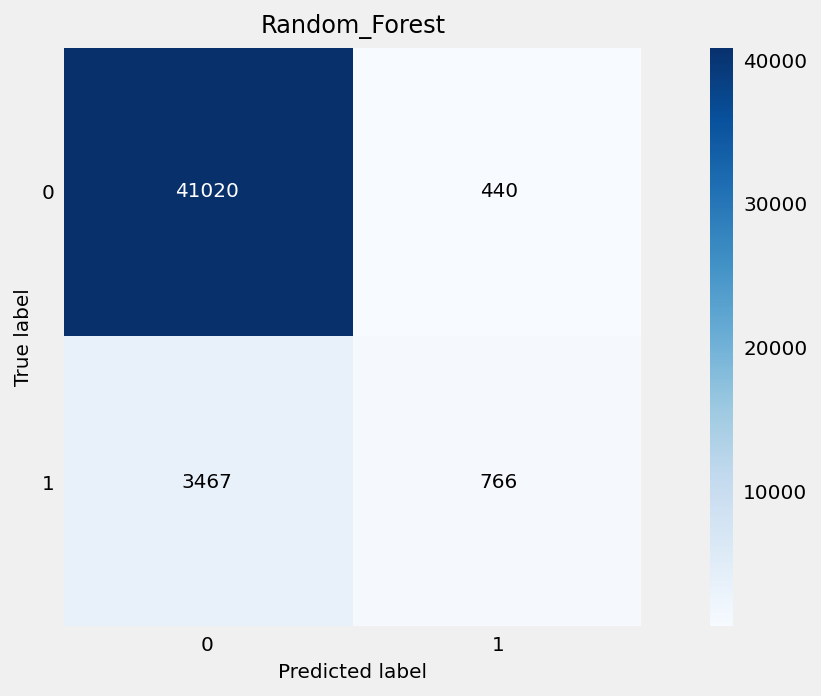

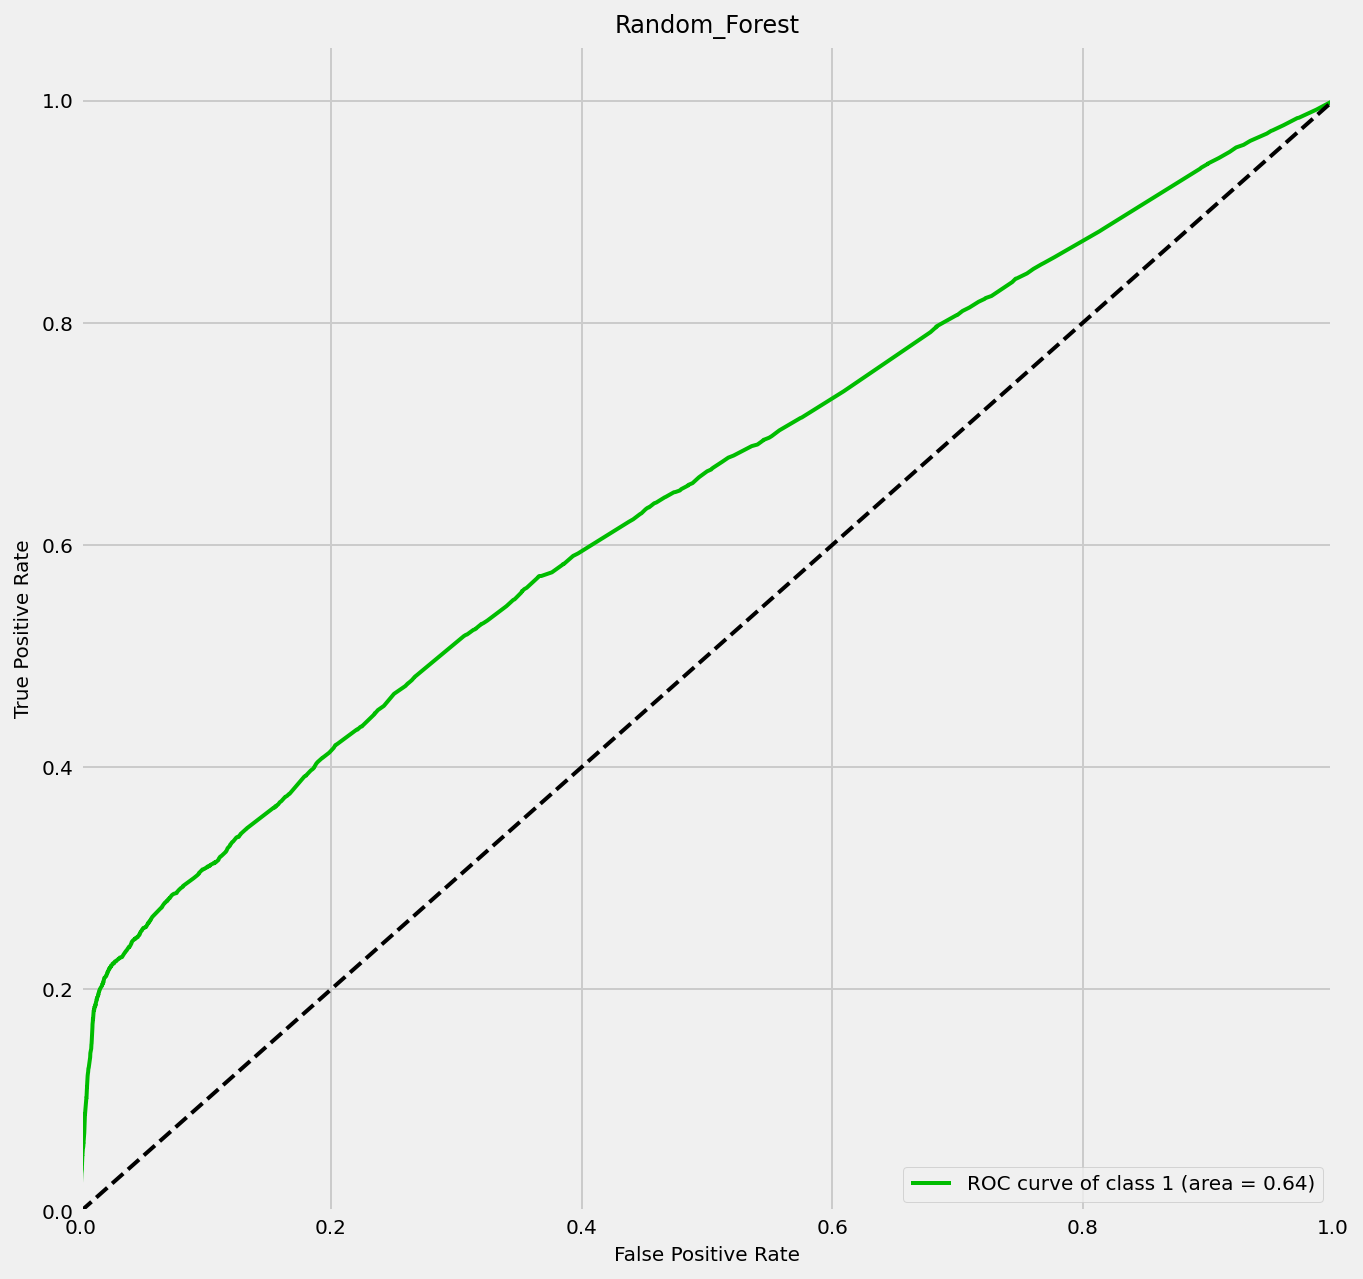

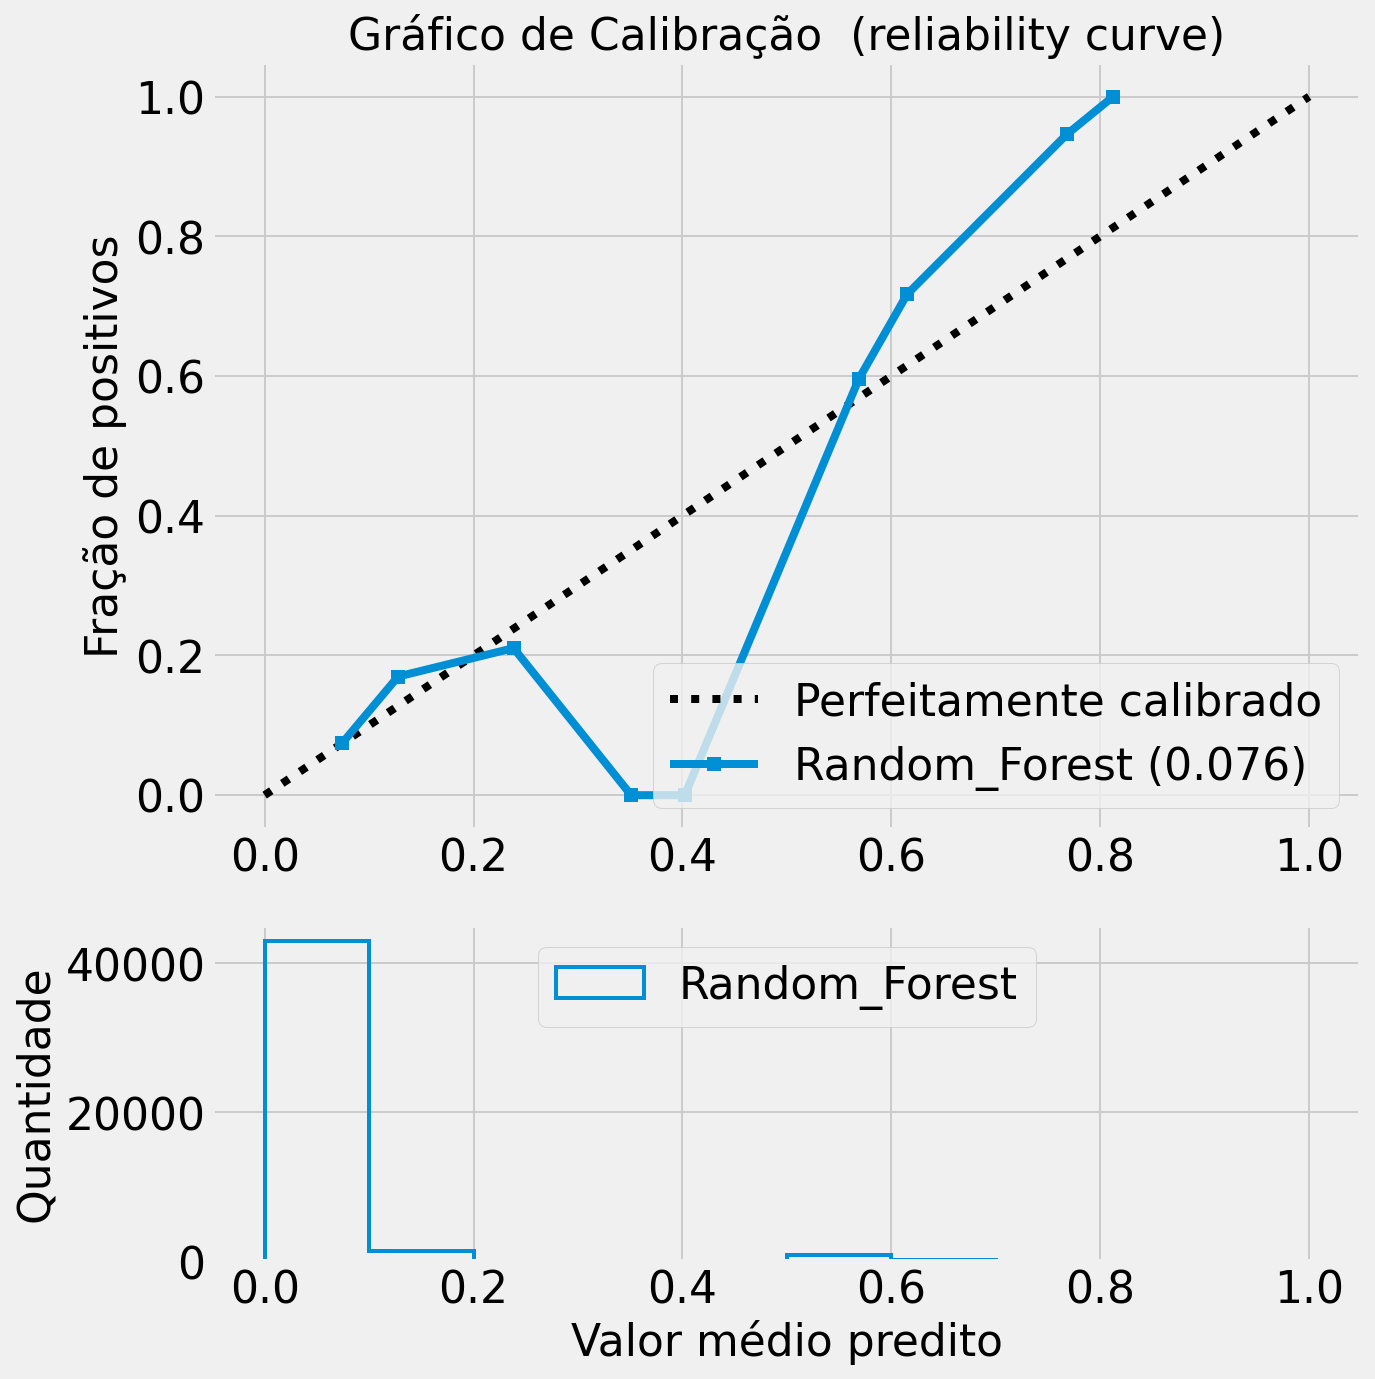

In [ ]:
# performance do modelo
runModel (rf, X_train, y_train, X_test, y_test, title="Random_Forest")


XGBOOST

XGBoost:
	Brier: 0.075
	ROC(AUC) 0.639
	Precision: 0.645
	Recall: 0.178
	F1: 0.279



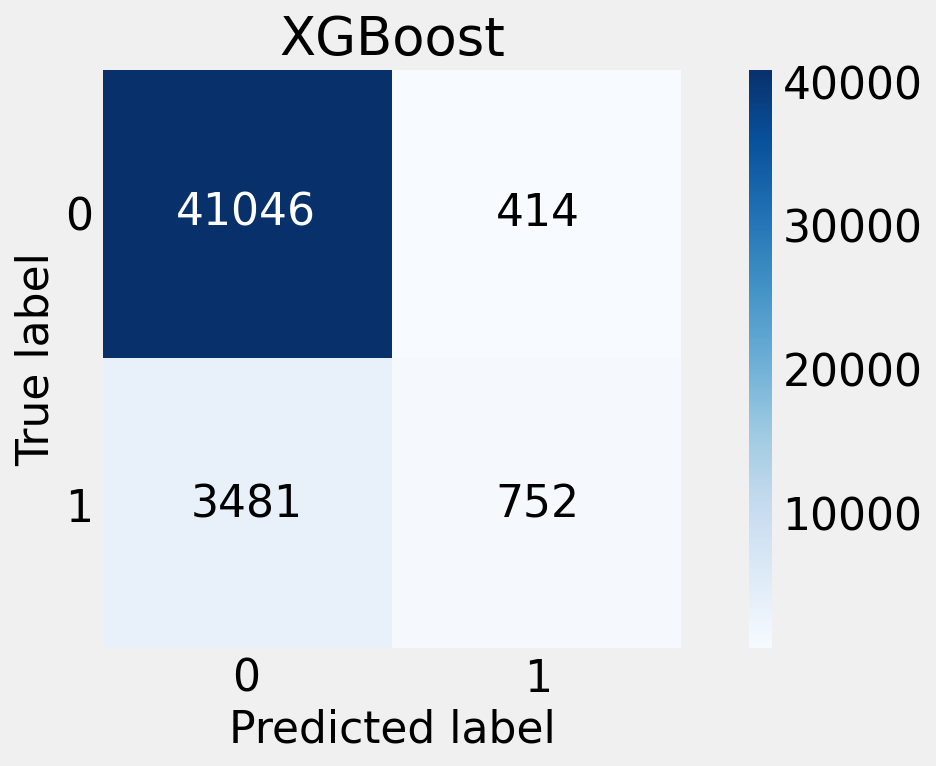

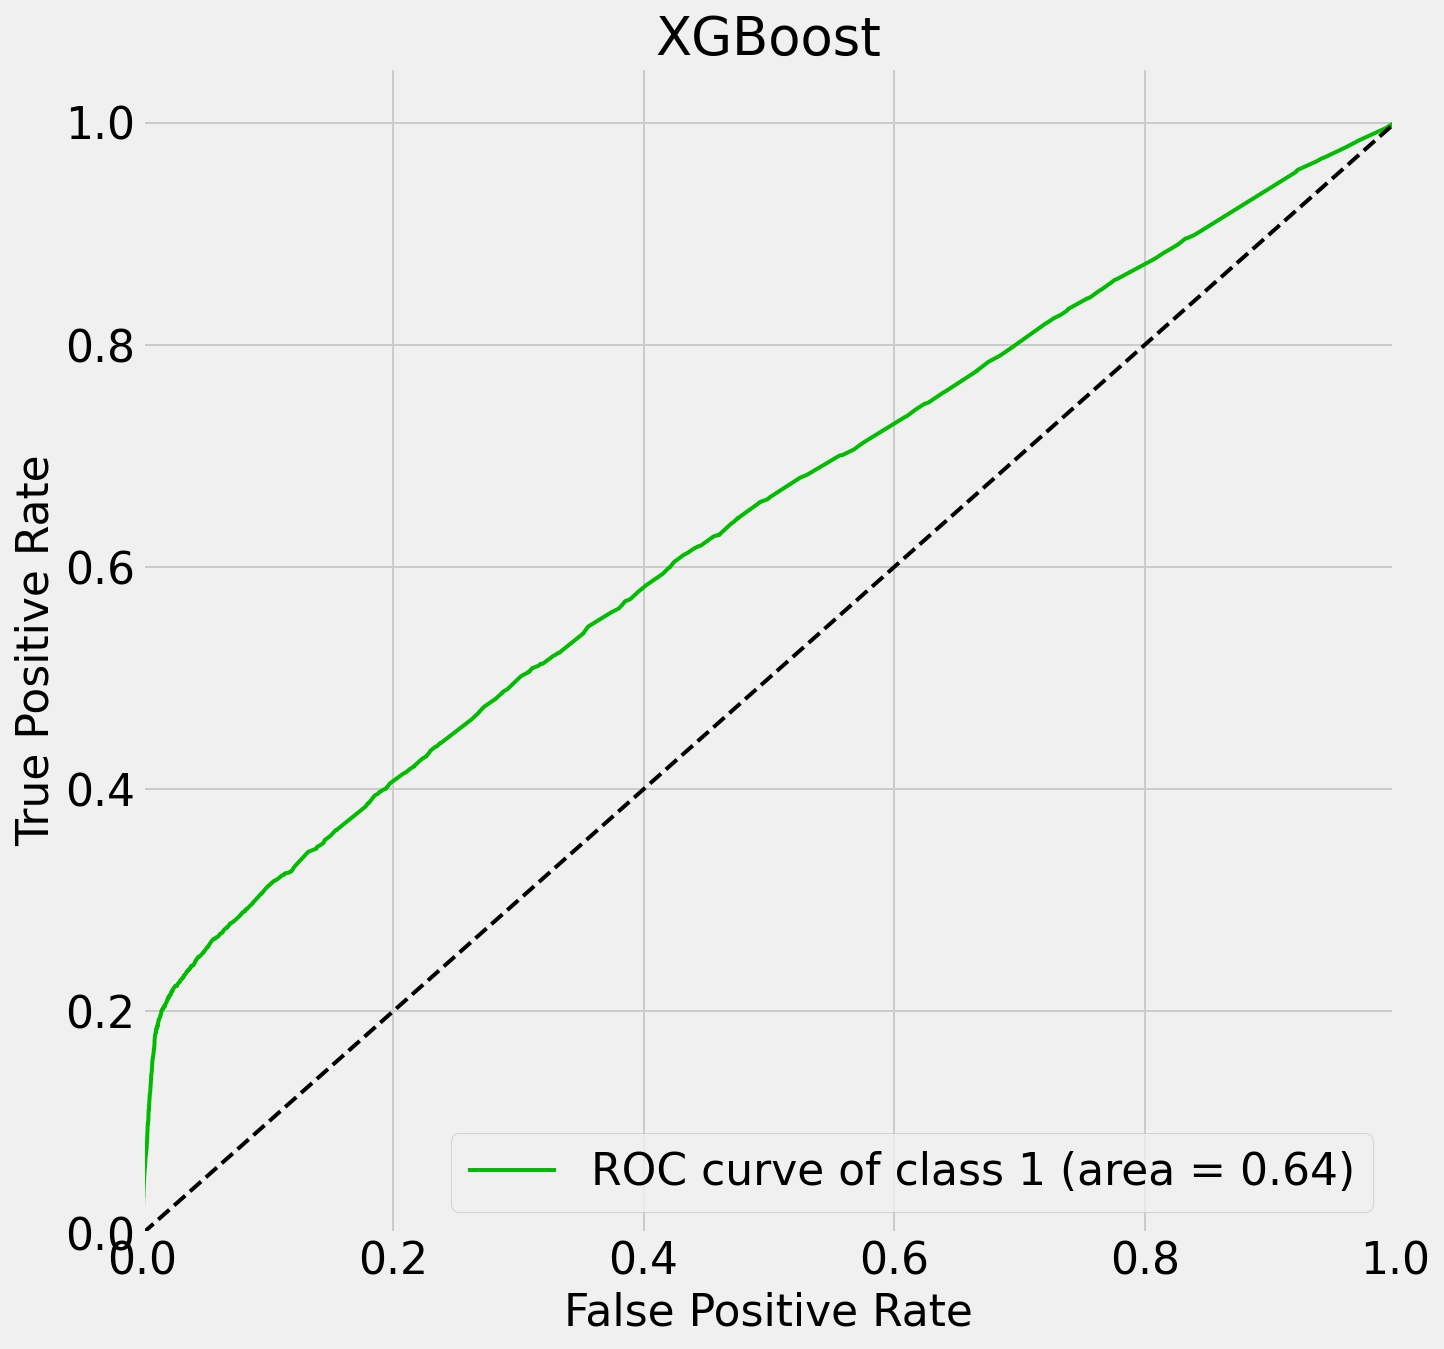

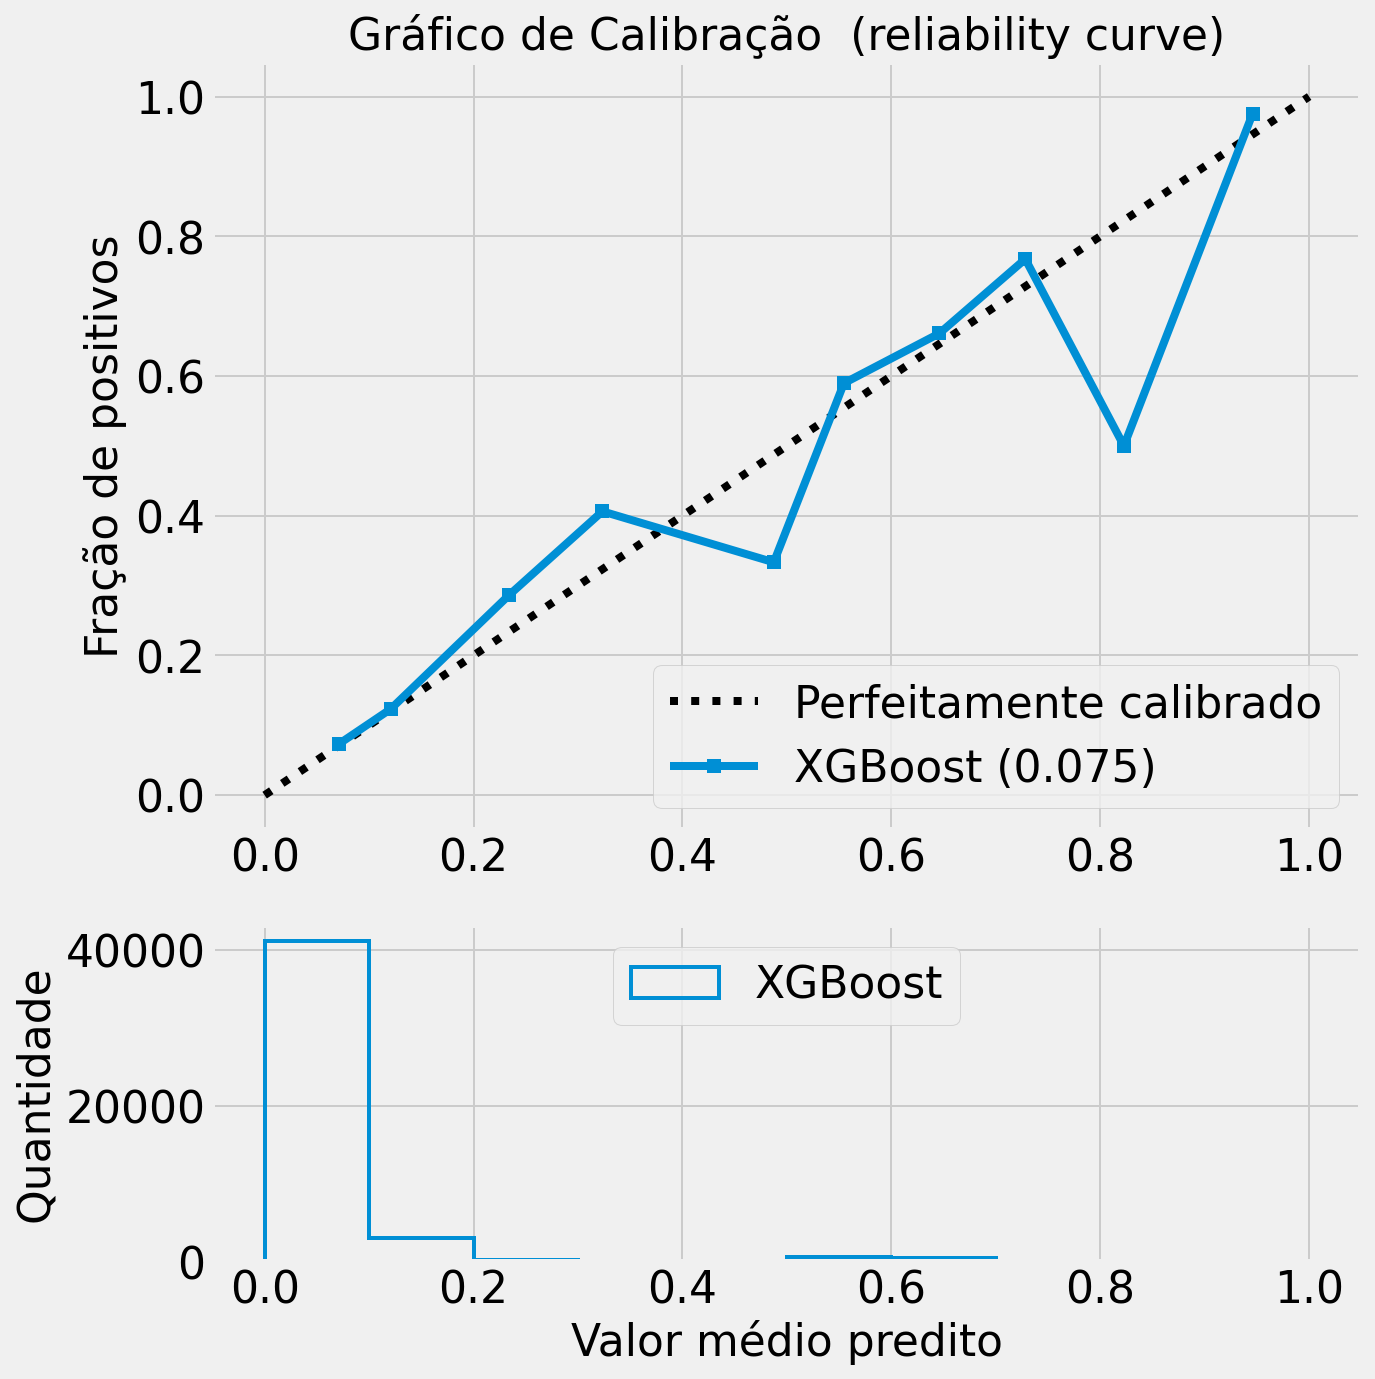

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
runModel(model, X_train, y_train, X_test, y_test, title="XGBoost")

LightGBM

LightGBM:
	Brier: 0.075
	ROC(AUC) 0.637
	Precision: 0.647
	Recall: 0.167
	F1: 0.266



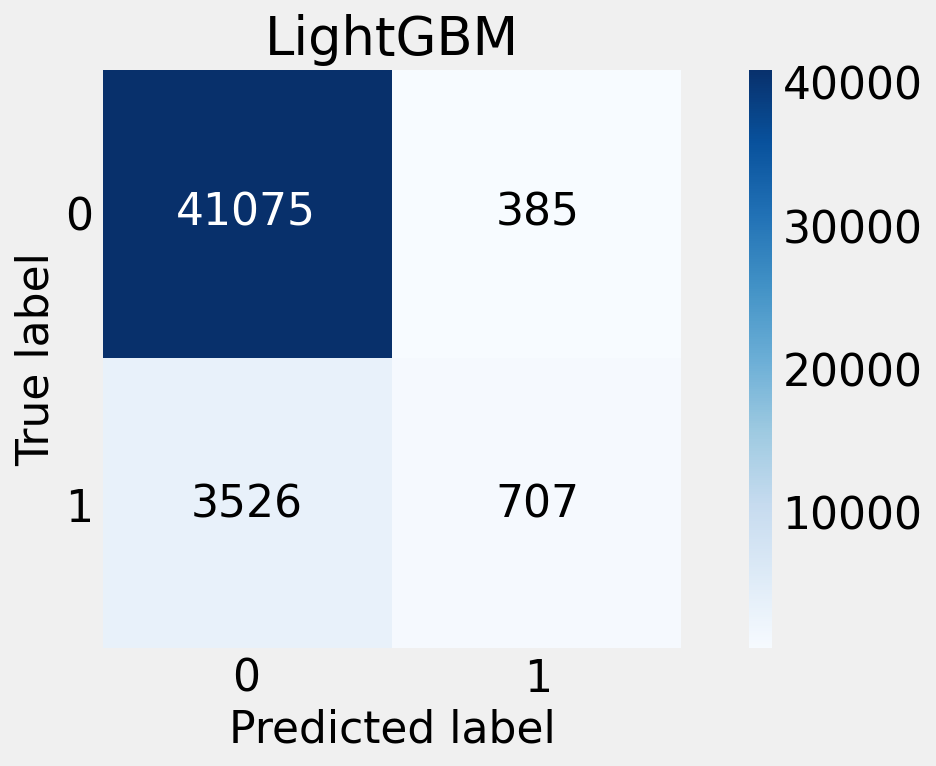

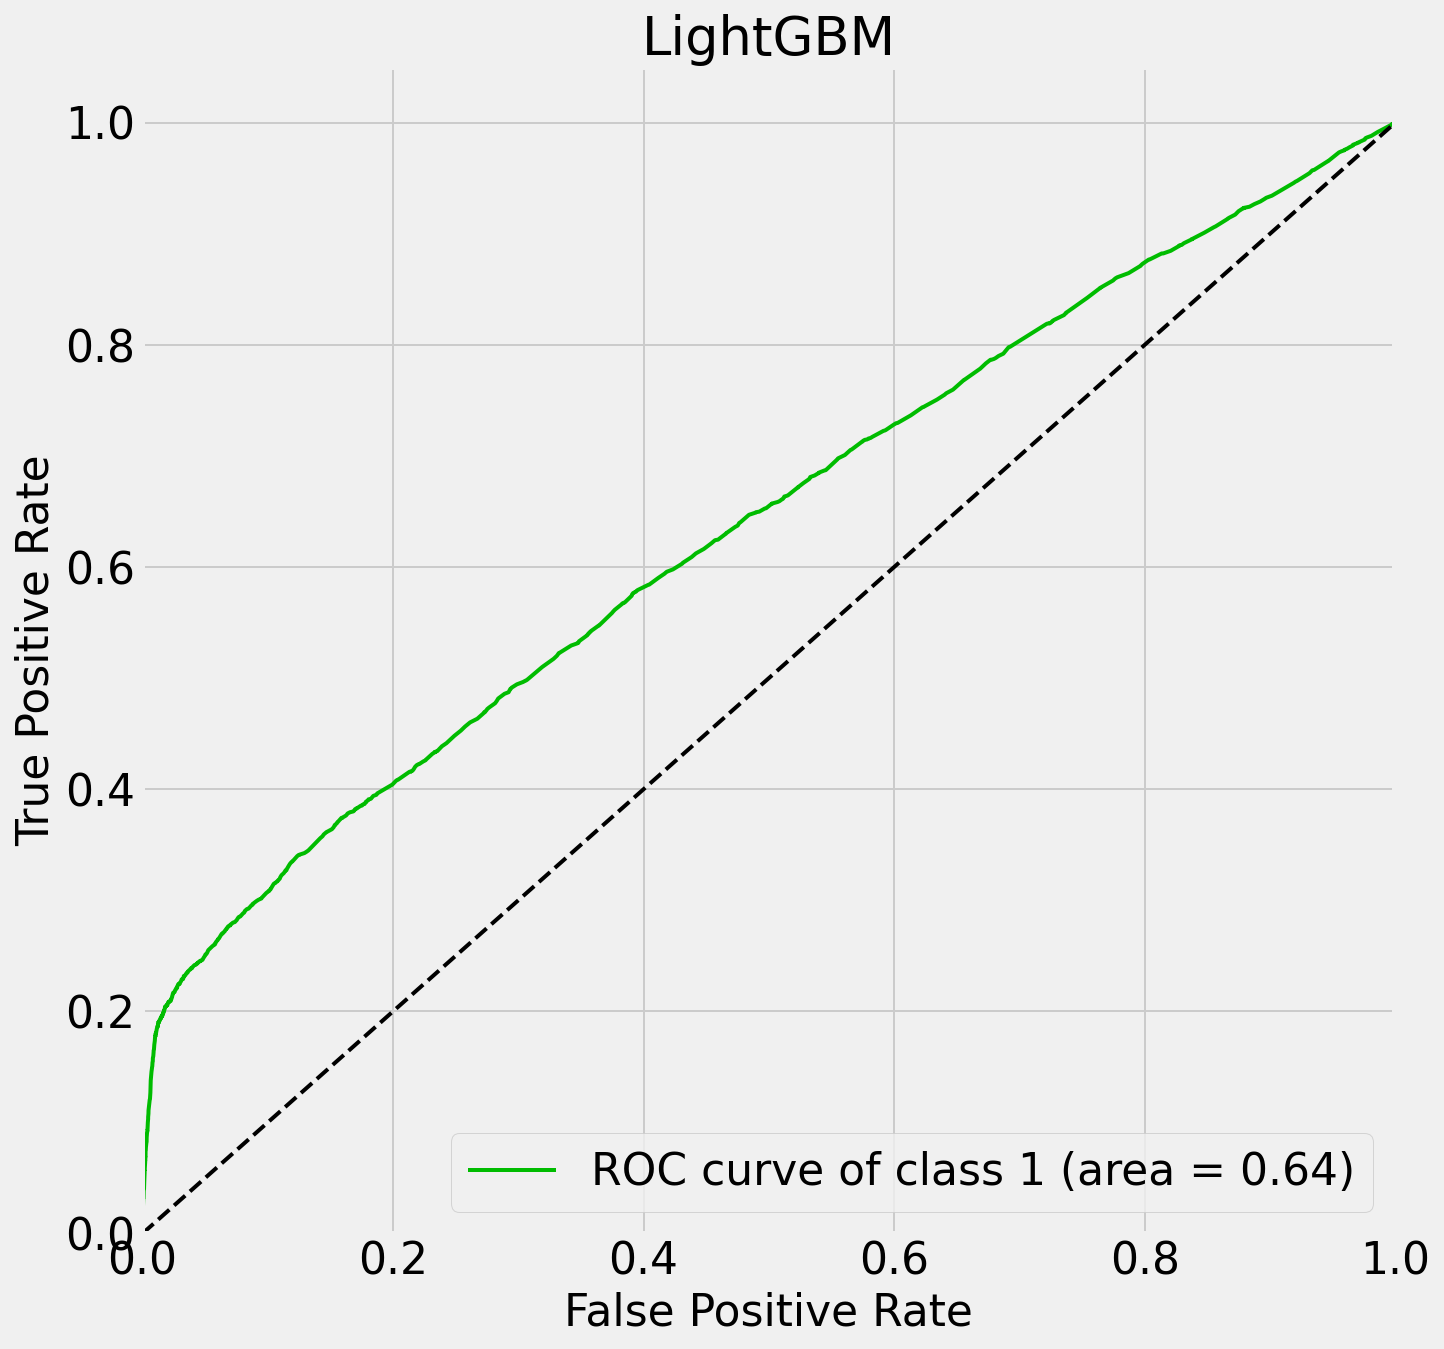

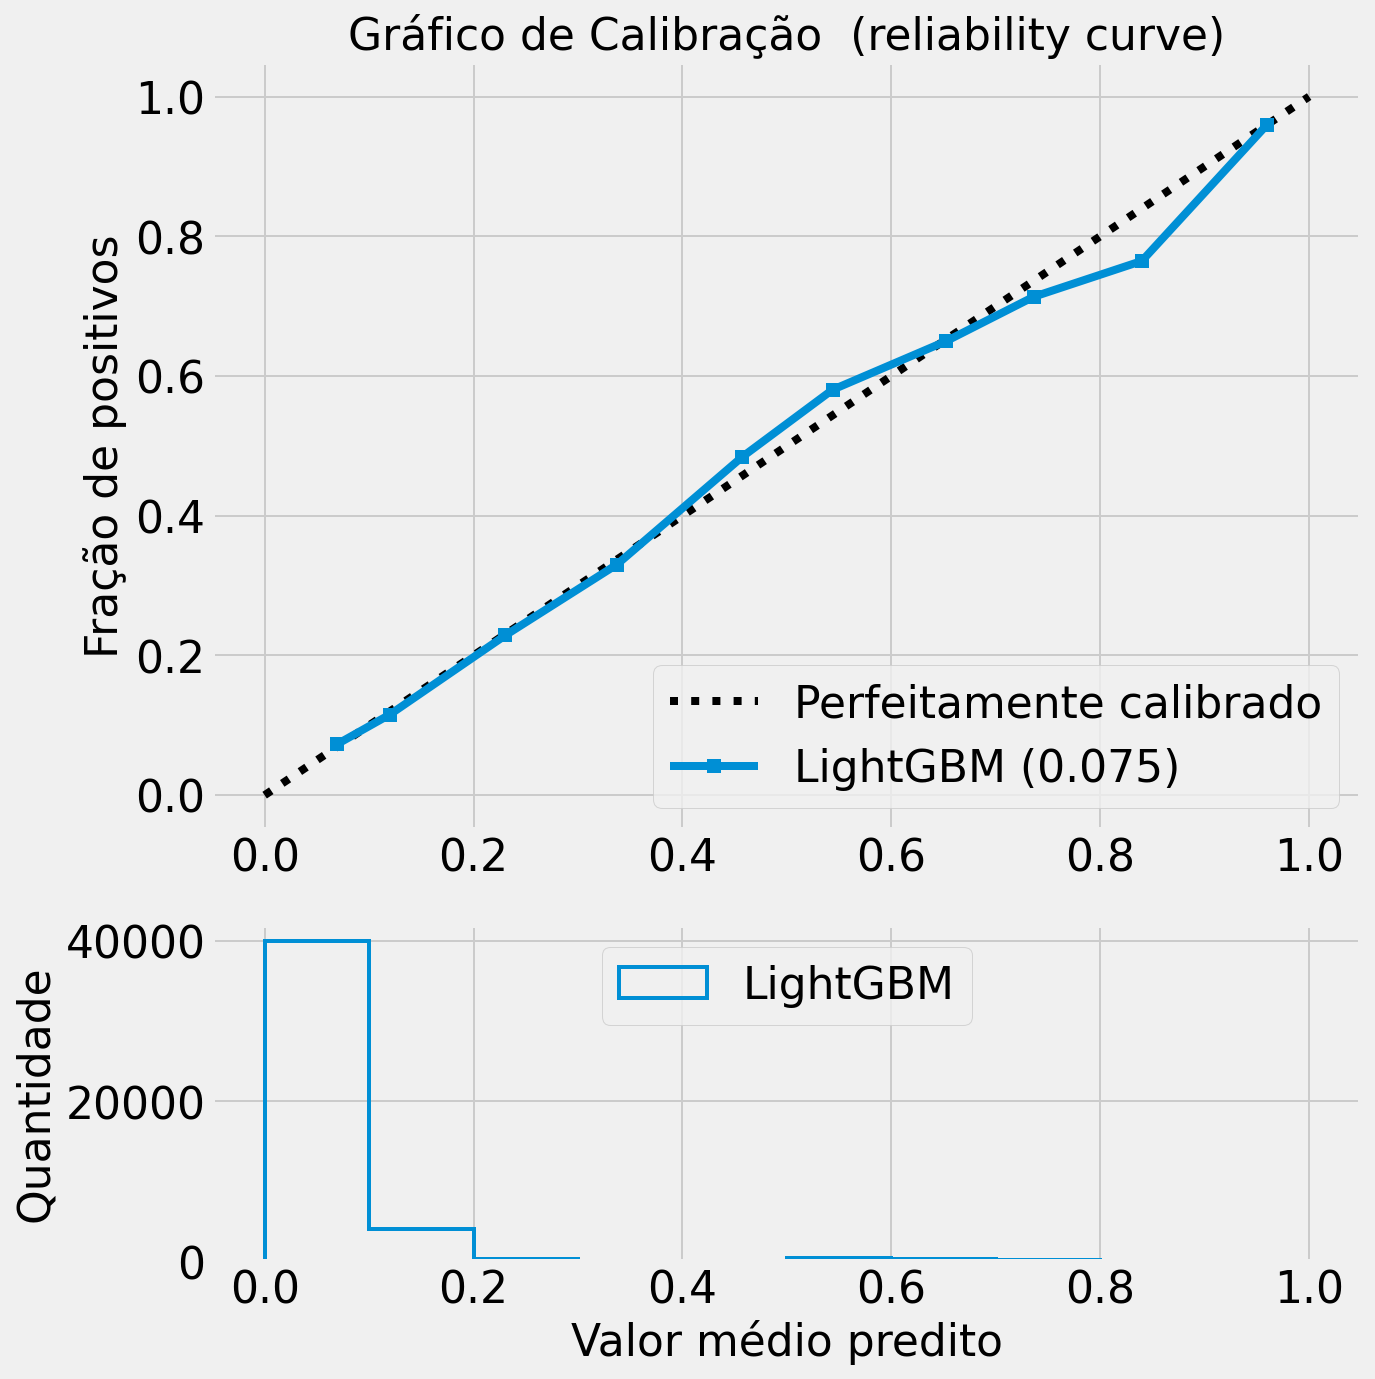

In [ ]:
import lightgbm as lgb
clf_lgbm = lgb.LGBMClassifier()
runModel(clf_lgbm, X_train, y_train, X_test, y_test, title="LightGBM")


Catboost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
clf_catboost = CatBoostClassifier()

Learning rate set to 0.075651
0:	learn: 0.6187452	total: 26.8ms	remaining: 26.7s
1:	learn: 0.5581055	total: 45.9ms	remaining: 22.9s
2:	learn: 0.5078863	total: 71.4ms	remaining: 23.7s
3:	learn: 0.4669622	total: 95.7ms	remaining: 23.8s
4:	learn: 0.4332581	total: 118ms	remaining: 23.4s
5:	learn: 0.4059429	total: 135ms	remaining: 22.3s
6:	learn: 0.3836103	total: 152ms	remaining: 21.5s
7:	learn: 0.3650276	total: 174ms	remaining: 21.5s
8:	learn: 0.3498593	total: 200ms	remaining: 22s
9:	learn: 0.3371760	total: 222ms	remaining: 22s
10:	learn: 0.3269291	total: 245ms	remaining: 22s
11:	learn: 0.3184688	total: 264ms	remaining: 21.7s
12:	learn: 0.3113360	total: 280ms	remaining: 21.3s
13:	learn: 0.3053429	total: 305ms	remaining: 21.5s
14:	learn: 0.3003424	total: 328ms	remaining: 21.5s
15:	learn: 0.2961565	total: 351ms	remaining: 21.6s
16:	learn: 0.2926659	total: 376ms	remaining: 21.7s
17:	learn: 0.2897562	total: 397ms	remaining: 21.7s
18:	learn: 0.2874632	total: 421ms	remaining: 21.8s
19:	learn: 0.

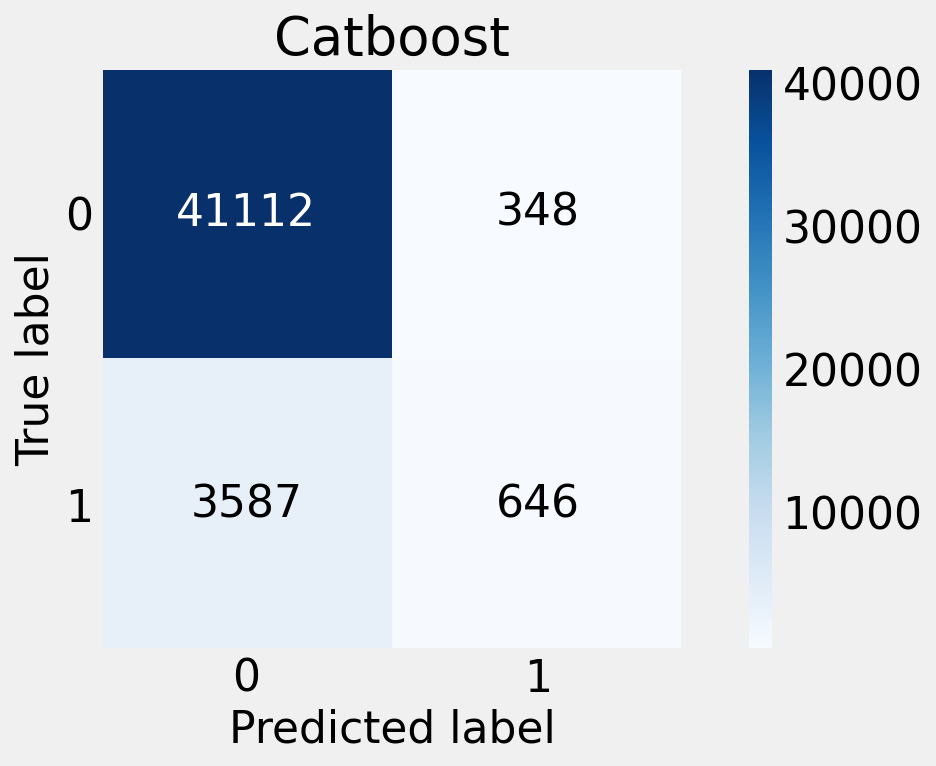

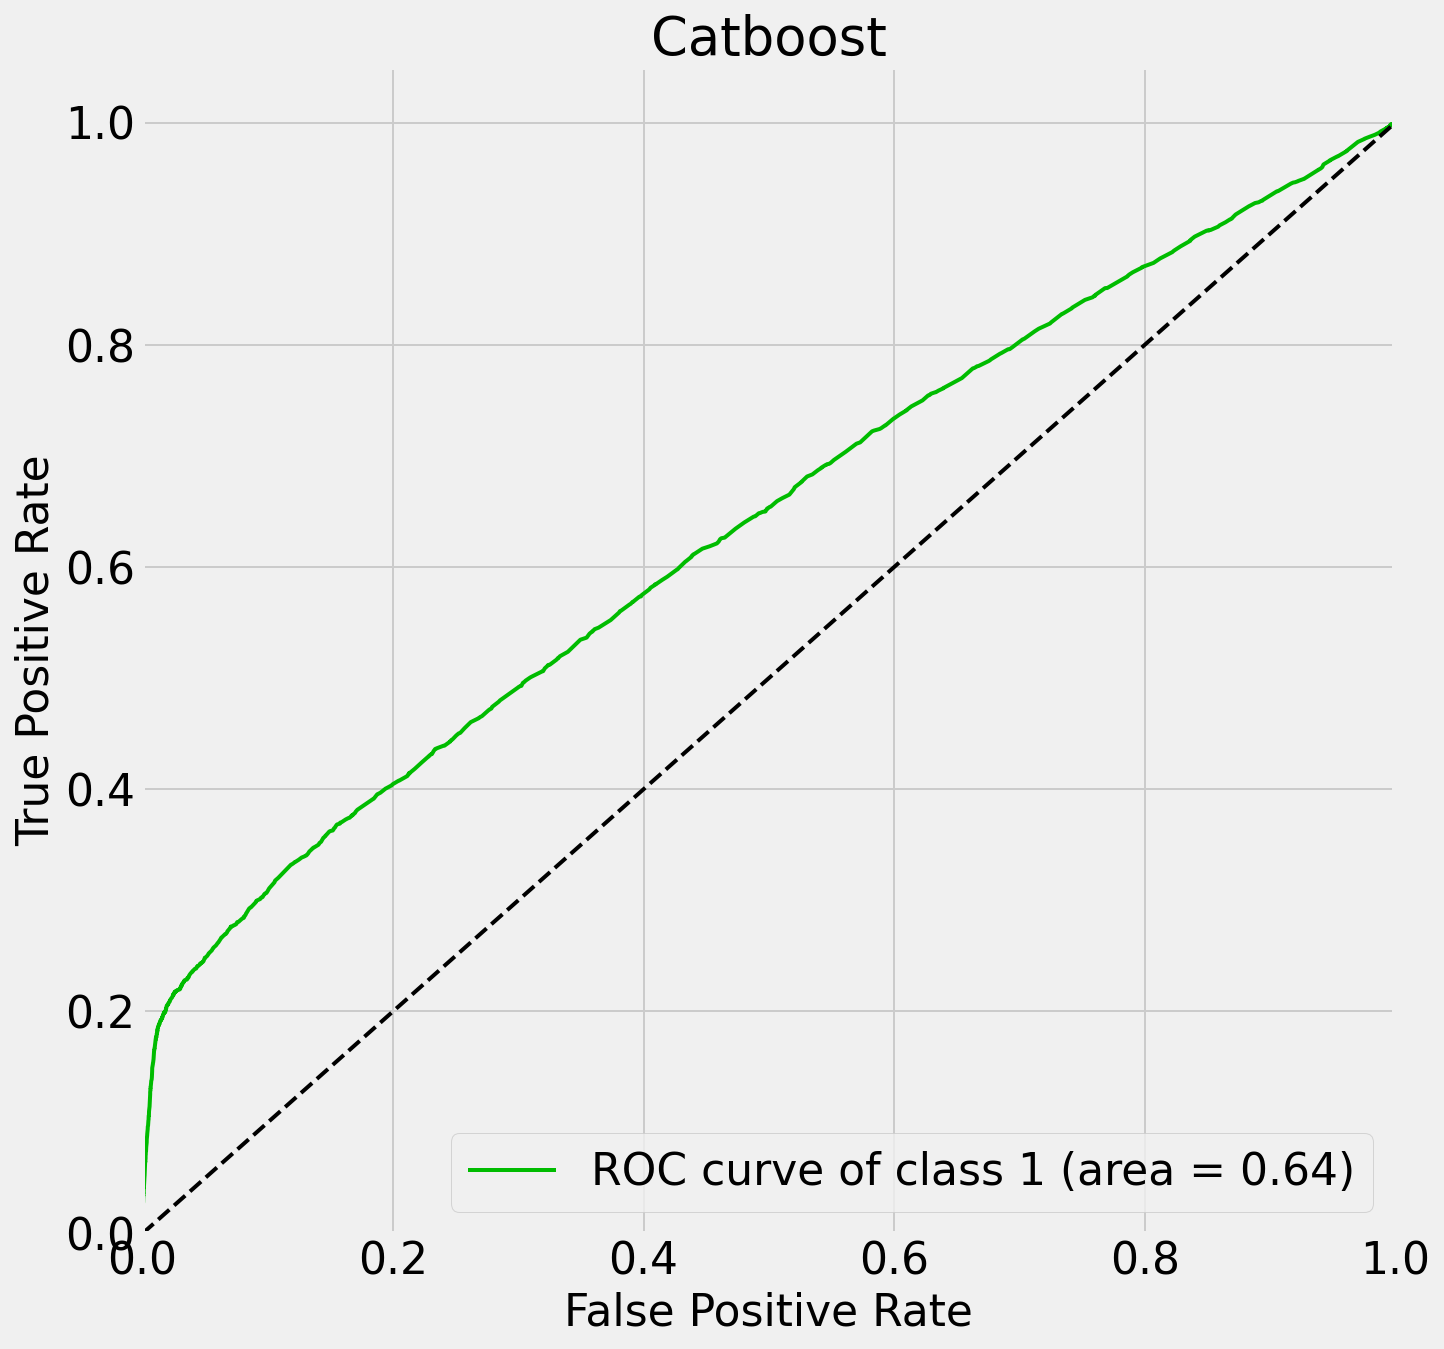

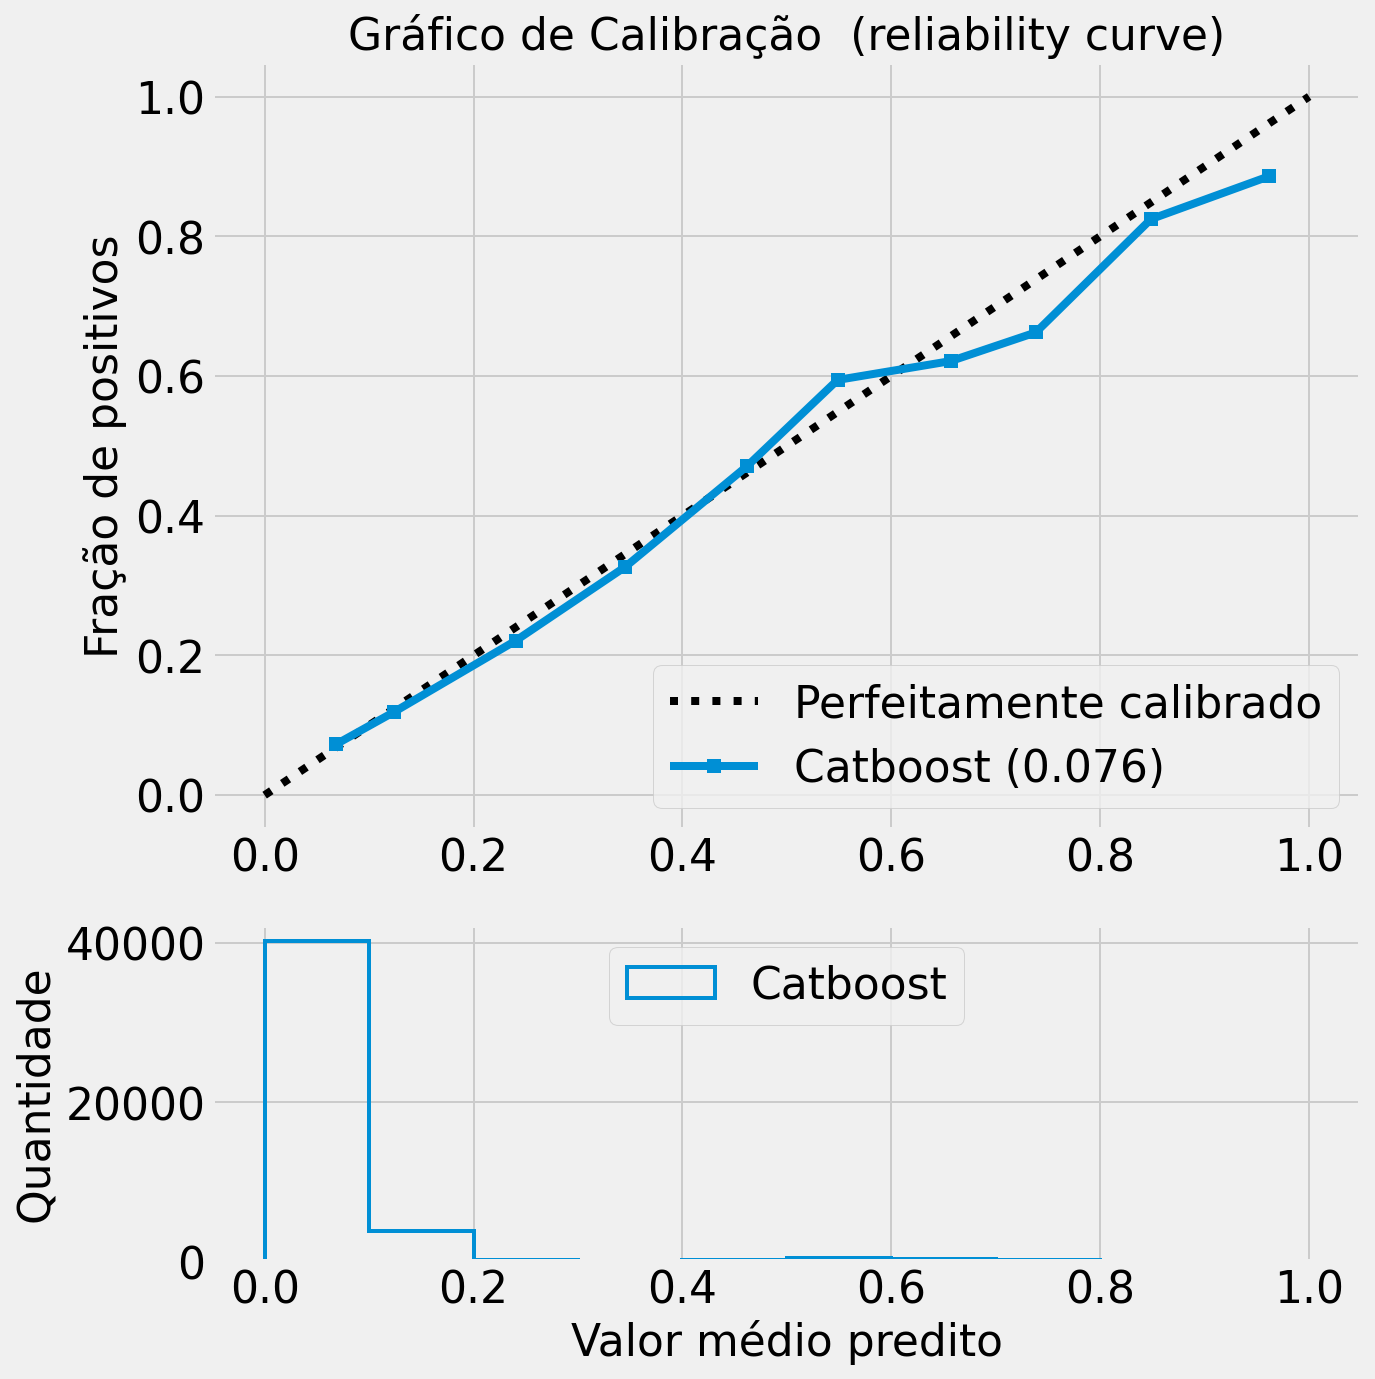

In [ ]:
runModel(clf_catboost, X_train, y_train, X_test, y_test, title="Catboost")

Modelos de predicao sem Automatizacao 

In [ ]:
!pip install catboost
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
prob_pos_rf = rf.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf)))

print(classification_report(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.9132
Precision: 0.6505
Recall: 0.1358
AUC: 0.6192
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.65      0.14      0.22      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.56      0.59     45693
weighted avg       0.89      0.91      0.89     45693



In [ ]:
# xgboost
clf_xgboost = xgb.XGBClassifier()
clf_xgboost.fit(X_train, y_train)

y_pred_xgboost = clf_xgboost.predict(X_test)
prob_pos_xgboost = clf_xgboost.predict_proba(X_test)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))

print(classification_report(y_test, y_pred_xgboost))

XGBoost Model
Accuracy: 0.9148
Precision: 0.6449
Recall: 0.1777
AUC: 0.6394
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.64      0.18      0.28      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.58      0.62     45693
weighted avg       0.90      0.91      0.89     45693



In [ ]:
# LightGBM
clf_lgbm = lgb.LGBMClassifier()
clf_lgbm.fit(X_train, y_train)

y_pred_lgbm = clf_lgbm.predict(X_test)
prob_pos_lgbm = clf_lgbm.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm)))


print(classification_report(y_test, y_pred_lgbm))

# quero ver o desemepenho no treino também
# prob_pos_lgbm_treino = clf_lgbm.predict_proba(X_train)[:,1]
# print("AUC treino: {:.4f}".format(roc_auc_score(y_train, prob_pos_lgbm_treino)))


LightGBM Model
Accuracy: 0.9144
Precision: 0.6474
Recall: 0.1670
AUC: 0.6373
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.65      0.17      0.27      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.58      0.61     45693
weighted avg       0.90      0.91      0.89     45693



In [ ]:
# Catboost
clf_catboost = CatBoostClassifier(iterations = 5)
clf_catboost.fit(X_train, y_train)

y_pred_catboost =clf_catboost.predict(X_test)
prob_pos_catboost = clf_catboost.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost)))

print(classification_report(y_test, y_pred_catboost))

Learning rate set to 0.5
0:	learn: 0.3538852	total: 26.1ms	remaining: 104ms
1:	learn: 0.2922053	total: 45.2ms	remaining: 67.8ms
2:	learn: 0.2781716	total: 75.8ms	remaining: 50.5ms
3:	learn: 0.2752161	total: 99.4ms	remaining: 24.8ms
4:	learn: 0.2736936	total: 126ms	remaining: 0us
Catboost Model
Accuracy: 0.9145
Precision: 0.6362
Recall: 0.1810
AUC: 0.6392
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.64      0.18      0.28      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.59      0.62     45693
weighted avg       0.90      0.91      0.89     45693



In [ ]:
col_names = ["Modelo", "Accuracy", "Precision", "Recall", "AUC(ROC)"]

data = [["Random Forest", accuracy_score(y_test, y_pred_rf),precision_score(y_test, y_pred_rf),recall_score(y_test, y_pred_rf),roc_auc_score(y_test, prob_pos_rf)],
        ["XGBoost", accuracy_score(y_test, y_pred_xgboost),precision_score(y_test, y_pred_xgboost),recall_score(y_test, y_pred_xgboost),roc_auc_score(y_test, prob_pos_xgboost)],
        ["LightGBM", accuracy_score(y_test, y_pred_lgbm),precision_score(y_test, y_pred_lgbm),recall_score(y_test, y_pred_lgbm),roc_auc_score(y_test, prob_pos_lgbm)],
        ["Catboost", accuracy_score(y_test, y_pred_catboost),precision_score(y_test, y_pred_catboost),recall_score(y_test, y_pred_catboost),roc_auc_score(y_test, prob_pos_catboost)]]
  

In [ ]:
pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

print('Resultados para conjunto de teste.')
df_results = pd.DataFrame(data, columns = col_names) # transformando os resultados do teste em um data.frame

# função para destacarmos os maiores valores em cada uma das métricas
def highlight_max(s):
    if s.dtype == np.object: 
        is_max = [False for _ in range(s.shape[0])] # estamos declarando que quando o tipo de dado for objeto, não aplicaremos o highlight
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]
  
df_results.style.apply(highlight_max)


Resultados para conjunto de teste.


,Modelo,Accuracy,Precision,Recall,AUC(ROC)
0,Random Forest,0.913181,0.650452,0.135837,0.619187
1,XGBoost,0.914757,0.644940,0.177652,0.639420
2,LightGBM,0.914407,0.647436,0.167021,0.637329
3,Catboost,0.914538,0.636213,0.180959,0.639241


Seleção de Variáveis - BORUTA

In [ ]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.4 MB/s 


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# criando estimador para o Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['idademae', 'idanomal', 'paridade', 'gravidez_1', 'gravidez_2', 'gravidez_3']
features in the blue area: []


In [ ]:
# Modelo com Boruta - Selecionado as variáveis preditoras
X_train_boruta = X_train[['idademae', 'idanomal', 'paridade', 'gravidez_1', 'gravidez_2', 'gravidez_3']]

X_test_boruta = X_test[['idademae', 'idanomal', 'paridade', 'gravidez_1', 'gravidez_2', 'gravidez_3']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)

Shape sem boruta (106617, 21) (45693, 21)
Shape com boruta (106617, 6) (45693, 6)


In [ ]:
# Retreinando os algoritmos

In [ ]:
# xgboost
clf_xgboost_boruta = xgb.XGBClassifier()
clf_xgboost_boruta.fit(X_train_boruta, y_train)

y_pred_xgboost_boruta = clf_xgboost_boruta.predict(X_test_boruta)
prob_pos_xgboost_boruta = clf_xgboost_boruta.predict_proba(X_test_boruta)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_boruta)))

print(classification_report(y_test, y_pred_xgboost))

XGBoost Model
Accuracy: 0.9145
Precision: 0.6352
Recall: 0.1810
AUC: 0.6153
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.64      0.18      0.28      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.58      0.62     45693
weighted avg       0.90      0.91      0.89     45693



In [ ]:
# comparando os resultados do teste

In [ ]:
print("###### XGBOOST SEM BORUTA #####")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))

print(classification_report(y_test, y_pred_xgboost))

print("\n", "###### XGBOOST COM BORUTA #####")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_boruta)))

print(classification_report(y_test, y_pred_xgboost))

###### XGBOOST SEM BORUTA #####
Accuracy: 0.9148
Precision: 0.6449
Recall: 0.1777
AUC: 0.6394
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.64      0.18      0.28      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.58      0.62     45693
weighted avg       0.90      0.91      0.89     45693


 ###### XGBOOST COM BORUTA #####
Accuracy: 0.9145
Precision: 0.6352
Recall: 0.1810
AUC: 0.6153
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41460
           1       0.64      0.18      0.28      4233

    accuracy                           0.91     45693
   macro avg       0.78      0.58      0.62     45693
weighted avg       0.90      0.91      0.89     45693



In [ ]:
X_train.columns

Index(['idademae', 'sexo', 'idanomal', 'paridade', 'escmae_1', 'escmae_2',
       'escmae_3', 'escmae_4', 'escmae_5', 'escmae_9', 'escmae2010_0.0',
       'escmae2010_1.0', 'escmae2010_2.0', 'escmae2010_3.0', 'escmae2010_4.0',
       'escmae2010_5.0', 'escmae2010_9.0', 'gravidez_1', 'gravidez_2',
       'gravidez_3', 'gravidez_9'],
      dtype='object')

In [ ]:
X_train_boruta.columns

Index(['idademae', 'idanomal', 'paridade', 'gravidez_1', 'gravidez_2',
       'gravidez_3'],
      dtype='object')

Importancia das variaveis pelo Shapley

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


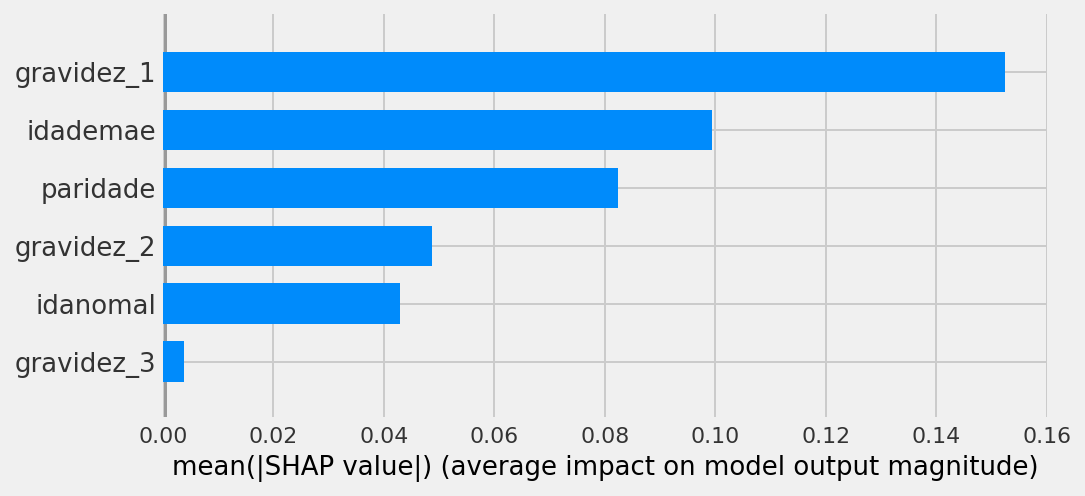

In [ ]:
# resultados no teste
shap_values_test = shap.TreeExplainer(clf_xgboost_boruta).shap_values(X_test_boruta)
shap.summary_plot(shap_values_test, X_test_boruta, plot_type="bar")

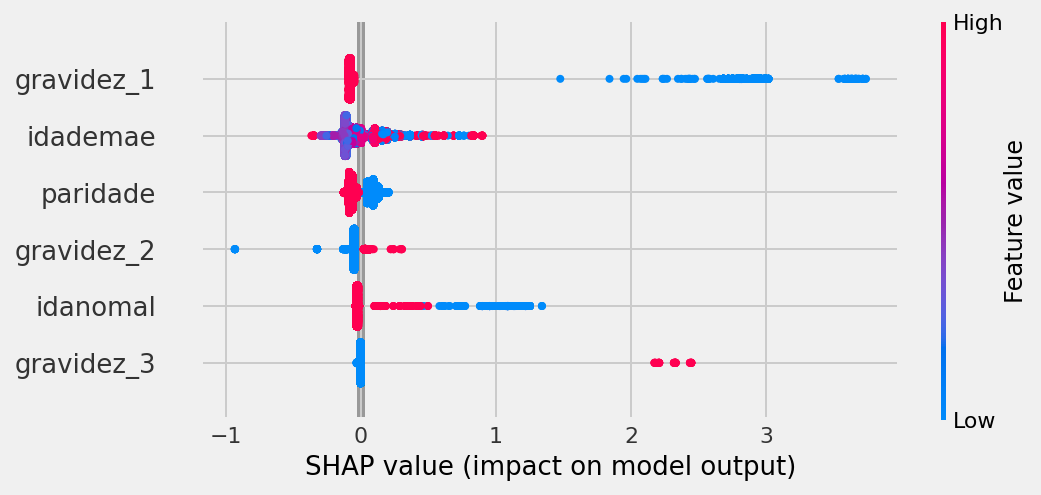

In [ ]:
shap.summary_plot(shap_values_test, X_test_boruta)

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(clf_xgboost_boruta)
shap_values = explainer.shap_values(X_test_boruta)

i = 0
# Inserindo os dados do paciente
print('Desfecho do paciente:', y_test[i])
print('Predição:', y_pred_xgboost_boruta[i])

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test_boruta.iloc[i,:])

Desfecho do paciente: 0
Predição: 0
